In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

plt.rc("figure", autolayout=True)
plt.rc("axes.spines", right=False, top=False)
plt.rc("font", family="serif")
plt.rc("figure", autolayout=True)
plt.rc("axes.spines", right=False, top=False)
plt.rc("font", family="serif")

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,tumor


In [4]:
df.tail()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
31,31,488,564,-29,1303,-9,1236,265,2203,41,...,16,0,109,21,6,-15,11,7,-145,Normal
32,32,164,330,-13,721,12,504,154,1381,78,...,-18,1,-1484,-4,-1,-1,3,-5,-63,Normal
33,33,1282,116,-4,542,0,1070,344,1903,42,...,5,3,128,25,2,0,7,3,-69,Normal
34,34,68,718,-50,1816,-28,251,38,598,73,...,47,-2,190,3,0,8,21,22,-214,Normal
35,35,928,332,4,412,0,681,267,1132,357,...,9,1,67,19,10,1,32,-5,72,Normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 7466 entries, Unnamed: 0 to y
dtypes: int64(7465), object(1)
memory usage: 2.1+ MB


In [6]:
#CHECK NULLS

In [7]:
df.isnull()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Unnamed: 0    0
X53416        0
M83670        0
X90908        0
M97496        0
             ..
M13699.1      0
X54489        0
T55008        0
M10065.2      0
y             0
Length: 7466, dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Columns: 7466 entries, Unnamed: 0 to y
dtypes: int64(7465), object(1)
memory usage: 2.1+ MB


In [11]:
df.columns

Index(['Unnamed: 0', 'X53416', 'M83670', 'X90908', 'M97496', 'X90908.1',
       'U37019', 'R48602', 'T96548', 'X64559',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'y'],
      dtype='object', length=7466)

In [12]:
#Check Unique Value

In [13]:
df['y'].unique()

array(['tumor', 'Normal'], dtype=object)

In [14]:
#Drop

In [15]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Columns: 7465 entries, X53416 to y
dtypes: int64(7464), object(1)
memory usage: 2.1+ MB


In [17]:
numeric_columns = df.select_dtypes("number")
print("Range of values:", 
      f"[{numeric_columns.min().min()}, {numeric_columns.max().max()}]\n"
      f"Size with {numeric_columns.dtypes.unique()[0]}:",
      f"{numeric_columns.memory_usage().sum() / 1024:.2f}KiB")

numeric_columns = numeric_columns.astype("int16")
print(f"Size with {numeric_columns.dtypes.unique()[0]}: "
      f"{numeric_columns.memory_usage().sum() / 1024:.2f}KiB")

Range of values: [-5655, 6628]
Size with int64: 2099.53KiB
Size with int16: 525.09KiB


In [18]:
corr = df.corr().unstack()
print("Top 15 positively correlated:\n", "-"*28, "\n\n",
      # We select 30 and drop duplicates since correlation is symmetric
      # i.e. correlation(a, b) == correlation(b, a)
      corr[corr < 1].nlargest(30).drop_duplicates(),
      "\n\nTop 15 negatively correlated:\n", "-"*28, "\n\n", 
      corr.nsmallest(30).drop_duplicates(),
      sep="")

Top 15 positively correlated:
----------------------------

X90908    X90908.1    0.999657
          T64171      0.998909
          T55255      0.998765
T64171    T55255      0.998747
X90908.1  T55255      0.998714
          T64171      0.998128
M31516    M31516.1    0.997726
M10373    T63266      0.997556
T55255    T63266      0.997480
T64171    H71150      0.997409
M10373    H71150      0.997366
X90908.1  T63266      0.997275
T55255    H71150      0.997253
X90908    M10373      0.997135
          T63266      0.997127
dtype: float64

Top 15 negatively correlated:
----------------------------

U14518    T89991     -0.998389
H59796    D63882     -0.997120
H89939    H88522     -0.984687
M55513    M55513.1   -0.984583
H92523    H88522     -0.984557
H92279    T89991     -0.982657
R23924    M24902     -0.980429
H37925    H11125.1   -0.977597
R16250.1  X13897.1   -0.977312
X83857    H88522     -0.976782
T67704    M24902     -0.974658
R55241    H92523     -0.974356
M97388    T89991     -0.973

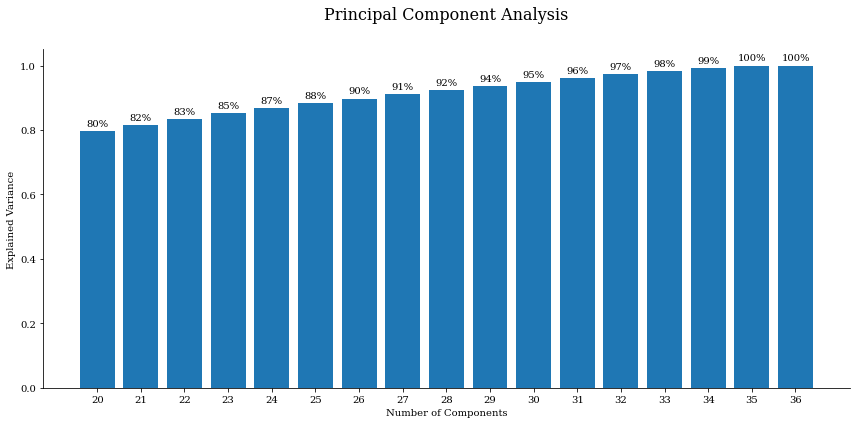

In [19]:
interval = range(20, 37)
variance_proportion = []
standardized_numeric_columns = StandardScaler().fit_transform(numeric_columns)

for n in interval:
    p = PCA(n).fit(standardized_numeric_columns)
    variance_proportion.append(p.explained_variance_ratio_.sum())

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(interval, variance_proportion)

# Add bar labels
for rect in bars:
    height = rect.get_height()
    ax.annotate(f"{height:.0%}", xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

ax.xaxis.set_major_locator(FixedLocator(interval))
ax.set_title("Principal Component Analysis", size=16, pad=30)
ax.set_xlabel("Number of Components")
_ = ax.set_ylabel("Explained Variance")

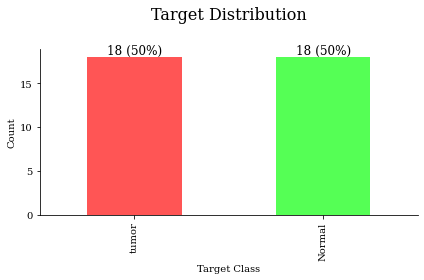

In [20]:
target_counts = df["y"].value_counts()
ax = target_counts.plot.bar(color=["#f55", "#5f5"])
for i, v in enumerate(target_counts):
    ax.text(i, v, f"{v} ({v / len(df):.0%})", ha='center', va='bottom', color='black', fontsize=12)
ax.yaxis.set_major_locator(FixedLocator(range(0, 20, 5)))

ax.set_title("Target Distribution", size=16, pad=30)
ax.set_xlabel("Target Class")
ax.set_ylabel("Count")
plt.show()

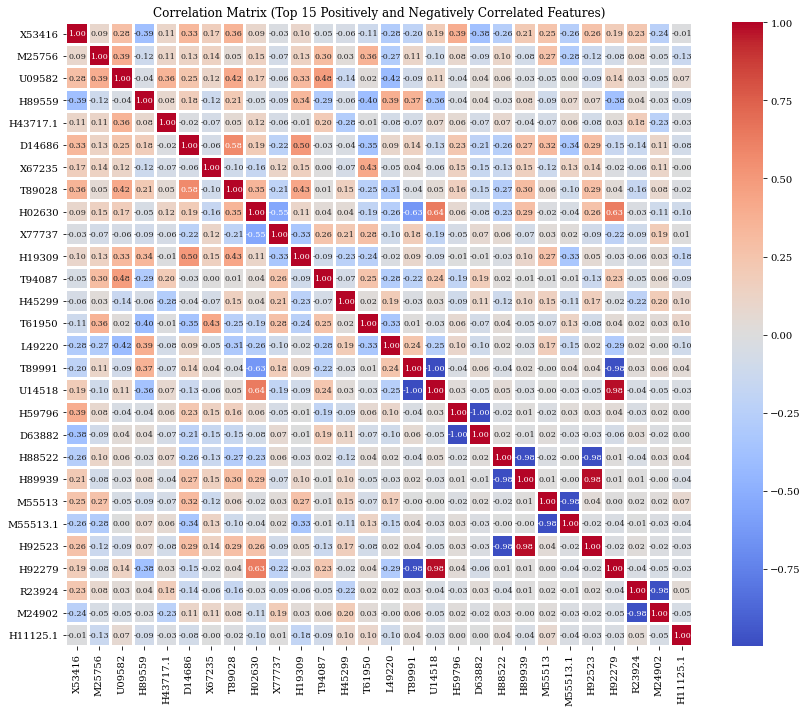

In [21]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Get the top 15 positively correlated features
top_15_pos_corr = correlation_matrix.unstack().sort_values(ascending=False)[:15]

# Get the top 15 negatively correlated features
top_15_neg_corr = correlation_matrix.unstack().sort_values(ascending=True)[:15]

selected_features = pd.concat([top_15_pos_corr, top_15_neg_corr])

# Extract column names from the MultiIndex
selected_features = selected_features.index.get_level_values(0).unique()

subset_df = df[selected_features]

subset_corr_matrix = subset_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(subset_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=2, annot_kws={"fontsize": 8})
plt.title("Correlation Matrix (Top 15 Positively and Negatively Correlated Features)")
plt.tight_layout()
plt.show()


In [22]:
#Label Encoding ()

In [23]:
label_encoder = preprocessing.LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])
df['y'].unique()

array([1, 0])

In [24]:
#Normalization

In [25]:
for i in df.columns:
    for j in df[i].values:
        if j > 1 or j <= -2:
            df[i] = (df[i] - np.min(df[i])) / (np.max(df[i]) - np.min(df[i]))

In [26]:
#Drop y(dependent var) to perform later Train test split

In [27]:
y = df["y"]
X = df.drop(["y"],axis = 1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [29]:
print(X_train.shape); print(y_train.shape)

(28, 7464)
(28,)


In [30]:
df.dtypes.value_counts()

float64    7464
int32         1
dtype: int64

In [31]:
numeric_columns = df.select_dtypes("number")
print("Range of values:", 
      f"[{numeric_columns.min().min()}, {numeric_columns.max().max()}]\n"
      f"Size with {numeric_columns.dtypes.unique()[0]}:",
      f"{numeric_columns.memory_usage().sum() / 1024:.2f}KiB")

numeric_columns = numeric_columns.astype("int16")
print(f"Size with {numeric_columns.dtypes.unique()[0]}: "
      f"{numeric_columns.memory_usage().sum() / 1024:.2f}KiB")



Range of values: [0.0, 1.0]
Size with float64: 2099.67KiB
Size with int16: 525.16KiB


In [32]:
#Machine Learning 

'''
Machine Learning (Classification)

    Logistic Regression
    KNN(K Neighbors)
    Decision Tree
    Random Forests
    SVM
    
    Voting from all above
    
    GBM (Gradient Boosting Machine)
    AdaBoost
    Bagging
    
    Perform gridsearch for hyperparameter tuning for each model
'''

'\nMachine Learning (Classification)\n\n    Logistic Regression\n    KNN(K Neighbors)\n    Decision Tree\n    Random Forests\n    SVM\n    \n    Voting from all above\n    \n    GBM (Gradient Boosting Machine)\n    AdaBoost\n    Bagging\n    \n    Perform gridsearch for hyperparameter tuning for each model\n'

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import r2_score

In [34]:
log_reg=LogisticRegression(random_state=0,max_iter=900)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=900, random_state=0)

In [35]:
y_pred=log_reg.predict(X_test)


In [36]:
log_reg.score(X_test,y_test)


1.0

In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4, 0],
       [0, 4]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Score :  1.0


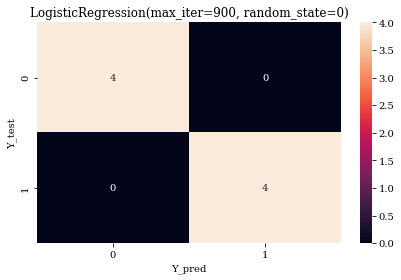

In [39]:
# Plotting of Confusion Matrics of Logistic Regression
from sklearn.metrics import confusion_matrix
pred_list = [log_reg]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

In [40]:
# GridSearchCV

params = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
lr_model = LogisticRegression(random_state = 0)
lr_cv = GridSearchCV(lr_model,params,cv = 5).fit(X_train,y_train)
lr_cv.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [41]:
log_reg2 = LogisticRegression(C = .01,random_state = 0,penalty= 'l2')
log_reg2.fit(X_train,y_train)

LogisticRegression(C=0.01, random_state=0)

In [42]:
log_reg2.predict(X_test)

array([0, 0, 1, 0, 0, 1, 1, 1])

In [43]:
log_reg2.score(X_test,y_test)

1.0

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[4, 0],
       [0, 4]], dtype=int64)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Score :  1.0


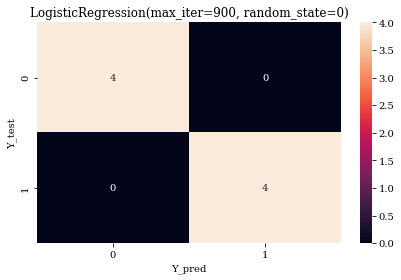

In [46]:
# Plotting of Confusion Matrics of Logistic Regression
from sklearn.metrics import confusion_matrix
pred_list = [log_reg]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

Score :  1.0


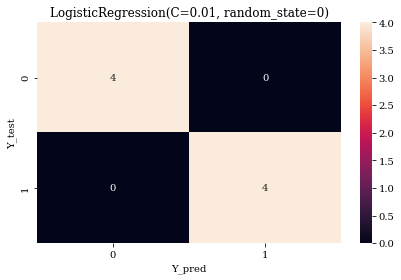

In [47]:
# Plotting of Confusion Matrics of Logistic Regression (tuned)
from sklearn.metrics import confusion_matrix
pred_list = [log_reg2]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

In [84]:
# KNN (K Neighbors)

knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
knn.score(X_test,y_test)

0.75

In [78]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1])

In [85]:
knn.score(X_test,y_test)

0.75

In [51]:
# Confusion Metrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4, 0],
       [2, 2]], dtype=int64)

In [52]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



Score :  0.75


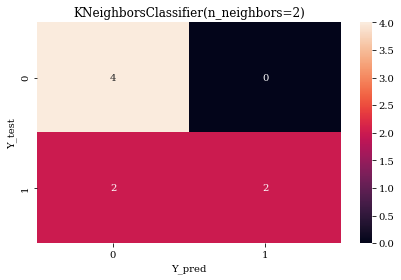

In [83]:
# Plotting of Confusion Matrix of KNN
from sklearn.metrics import confusion_matrix
pred_list = [knn]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

In [54]:
# DecisionTree
# prediction

# Create an instance of the DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0).fit(X_train,y_train)

# Fit the classifier to the training data
tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree.predict(X_test)

# Print the predicted labels
print(y_pred)


[0 0 1 0 0 1 1 1]


In [55]:
#DecisionTree Accuracy

tree.score(X_test,y_test)

1.0

In [56]:
params = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50))}
tree_model = DecisionTreeClassifier(random_state = 0)
tree_cv = GridSearchCV(tree_model, params, cv = 10, n_jobs = -1).fit(X_train,y_train)
tree_cv.best_params_



{'max_depth': 1, 'min_samples_split': 2}

In [57]:
tree_tuned = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 7, min_samples_split = 2,random_state = 42).fit(X_train,y_train)
tree_tuned.score(X_test,y_test)

1.0

Score :  1.0


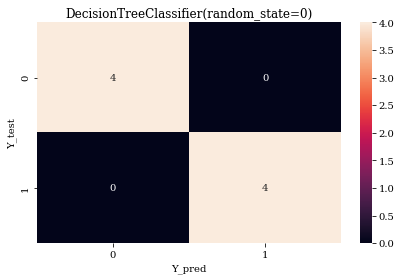

In [58]:
# Plotting of Confusion Matrix of Decision Tree Classifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred_list = [tree]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

In [59]:
# Random Forest

rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
rf.score(X_test,y_test)


1.0

Score :  1.0


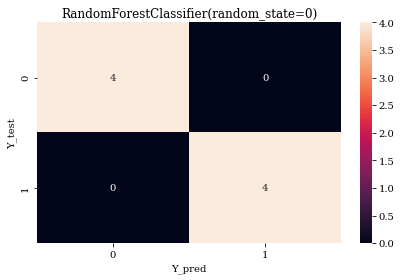

In [60]:
# Plotting of confusion matrix of Random Forest Classifier
from sklearn.metrics import confusion_matrix
pred_list = [rf]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

In [61]:
# SVM 

svm = SVC(random_state = 42).fit(X_train,y_train)
svm.score(X_test,y_test)

1.0

In [62]:
# Ensemble learning techniques

Voting Classifier Accuracy: 1.0


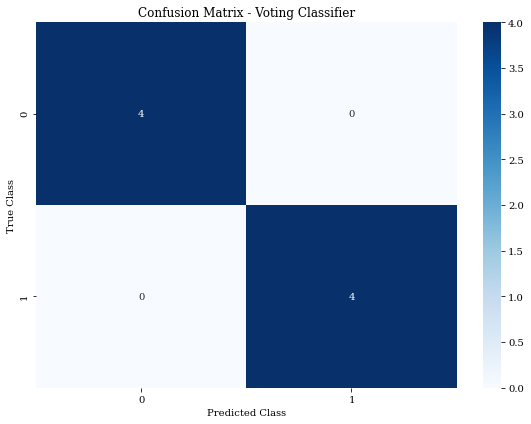

In [90]:
from sklearn.ensemble import VotingClassifier

log_reg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
rf = RandomForestClassifier(random_state=0)
gbm_tuned = GradientBoostingClassifier(max_depth=2, learning_rate=0.01, min_samples_split=2, n_estimators=100, random_state=42)
svm = SVC(random_state=42)
ada_tuned = AdaBoostClassifier(learning_rate=0.01, n_estimators=1000, random_state=42)
bag_tuned = BaggingClassifier(n_estimators=45, random_state=42)

classifiers = [('Logistic Regression', log_reg),
               ('KNN', knn),
               ('Random Forest', rf),
               ('Gradient Boosting', gbm_tuned),
               ('SVM', svm),
               ('AdaBoost', ada_tuned),
               ('Bagging', bag_tuned)]

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=classifiers)

voting_classifier.fit(X_train, y_train)

accuracy = voting_classifier.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = voting_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [64]:
# GBM
gbm = GradientBoostingClassifier(random_state = 42).fit(X_train,y_train)
gbm.score(X_test,y_test)

1.0

In [65]:
gbm_tuned = GradientBoostingClassifier(max_depth = 2, learning_rate = 0.01, min_samples_split = 2, n_estimators = 100, random_state = 42).fit(X_train,y_train)
gbm_tuned.score(X_test,y_test)

1.0

In [66]:
# Adaboost
ada = AdaBoostClassifier(random_state = 42).fit(X_train,y_train)
ada.score(X_test,y_test)

1.0

In [67]:
ada_tuned = AdaBoostClassifier(learning_rate = 0.01,n_estimators = 1000,random_state = 42).fit(X_train,y_train)
ada_tuned.score(X_test,y_test)

1.0

In [68]:
# Bagging
bag = BaggingClassifier(random_state = 42).fit(X_train,y_train)
bag.score(X_test,y_test)

1.0

In [69]:
bag_tuned = BaggingClassifier(n_estimators = 45,random_state = 42).fit(X_train,y_train)
bag_tuned.score(X_test,y_test)

1.0

In [70]:
#Compare 

Score: 1.0


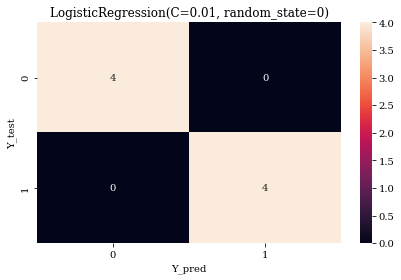

Score: 0.75


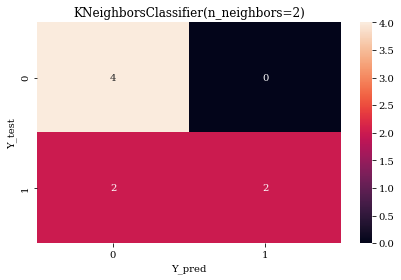

Score: 1.0


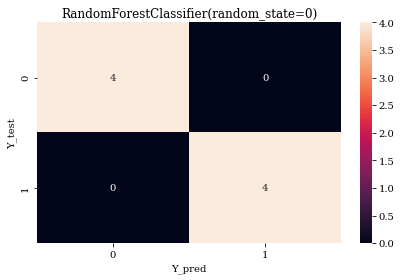

Score: 1.0


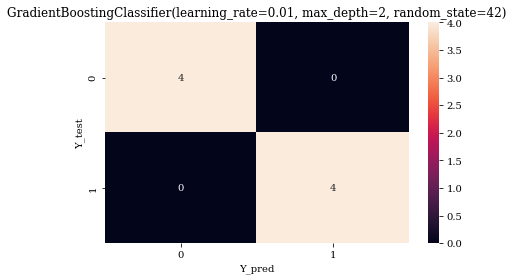

Score: 1.0


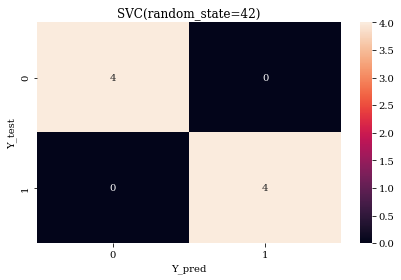

Score: 1.0


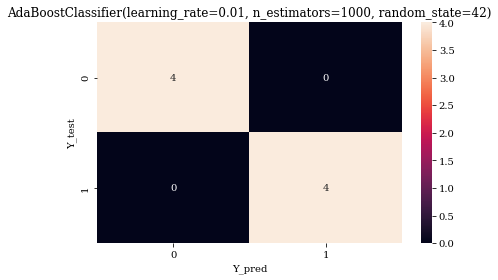

Score: 1.0


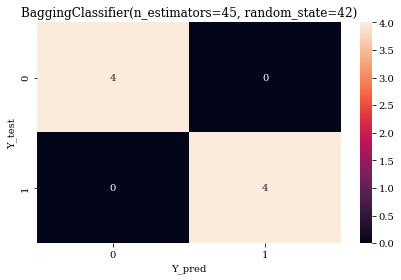

In [80]:
pred_list = [log_reg2, knn, rf, gbm_tuned, svm, ada_tuned, bag_tuned]

for classifier in pred_list:
    classifier.fit(X_train, y_train)  # Fit the classifier with training data
    score = classifier.score(X_test, y_test)
    y_pred = classifier.predict(X_test)
    
    print("Score:", score)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(str(classifier))
    plt.show()
